# Modelo
# ======


# Importamos las librerías necesarias

In [9]:
import pandas as pd
from funpymodeling import status

In [10]:
data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=',')
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,transactionFailed,0,0.0,455,0.730337,2,bool
1,fraudulent,0,0.0,107,0.171750,3,int64
2,customerIPAddressVersion,0,0.0,455,0.730337,3,float64
3,"orderAmount_(9.999, 18.4]",0,0.0,527,0.845907,2,int64
4,"orderAmount_(18.4, 30.0]",0,0.0,527,0.845907,2,int64
...,...,...,...,...,...,...,...
62,emailDomain_nan,0,0.0,623,1.000000,1,int64
63,sameCity_no,0,0.0,486,0.780096,2,int64
64,sameCity_unknown,0,0.0,139,0.223114,2,int64
65,sameCity_yes,0,0.0,621,0.996790,2,int64


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['fraudulent'], axis=1),
                                                    data['fraudulent'],
                                                    test_size=0.3,
                                                    random_state=99)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=99)

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=99)

In [14]:
rf.score(X_test, y_test)

0.8983957219251337

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

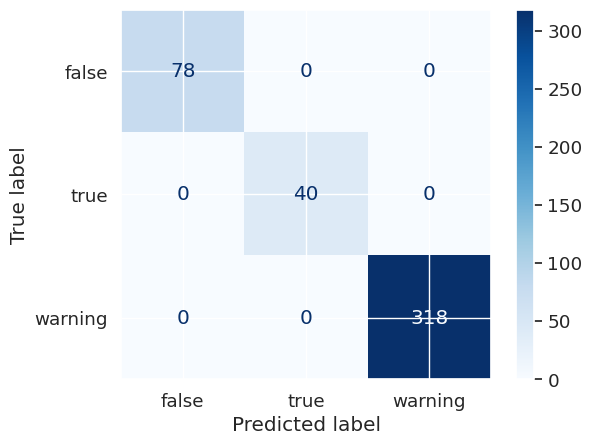

In [28]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, X_train, y_train,
    display_labels=['false','true','warning'],
    cmap='Blues',
    )

In [30]:
import pickle

with open('../data/modelo_proyecto_final.pkl', 'wb') as handle:
    pickle.dump(rf, handle, protocol=pickle.HIGHEST_PROTOCOL)